<a href="https://colab.research.google.com/github/Bhardwaj-Sarthak/Personal-Projects/blob/main/01_language_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Language models (58 points)

The first homework focuses on the following skills: being able to work with concpetual & formal exercises on language modeling and neural networks, understanding configurations of state-of-the-art language models and, finally, fine-tuning a language model yourself!

### Logistics

* submission deadline: May 13th 23:59 German time via Moodle
  * please upload a **SINGLE ZIP FILE named Surname_FirstName_HW1.zip** containing the .ipynb file of the notebook (if you solve it on Colab, you can go to File > download).
* please make sure to **KEEP** the outputs of your notebook cells where needed, so that we can inspect them.
* please solve and submit the homework **individually**!
* if you use Colab, to speed up the execution of the code on Colab (especially Exercise 3), you can use the available GPU (if Colab resources allow). For that, before executing your code, navigate to Runtime > Change runtime type > GPU > Save.

## Exercise 1: Understanding language modeling (12 points)

Please answer the following exercises. Importantly, please reason step by step; i.e., where calculations are required, please provide intermediate steps of how you arrived at your solution. You do not need to write any code, just mathematical solutions.

> 1. [6pts] Consider the corpus $C$ with the following sentences: $C=${"The cat sneezes", "The bird sings", "The cat sneezes", "A dog sings"}.
> (a) Define the vocabulary $V$ of this corpus (assuming by-word tokenization).
> (b) Pick one of the four sentences in $C$. Formulate the probability of that sentence in the form of the chain rule. Calculate the probability of each termn in the chain rule, given the corpus (assuming that there is, additionally, a start-of-sequence and an end-of-sequence token).
> 2. [4pts] We want to train a neural network that takes as input two numbers $x_1, x_2$, passes them through three hidden linear layers, each with 13 neurons, each followed by the ReLU activation function, and outputs three numbers $y_1, y_2, y_3$. Write down all weight matrices of this network with their dimensions. (Example: if one weight matrix has the dimensions 3x5, write $M_1\in R^{3\times5}$)
> 3. [2pts] Consider the sequence: "Input: Some students trained each language model". Assuming that each word+space/punctuation corresponds to one token, consider the following token probabilities of this sequence under some trained language model: $p = [0.67, 0.91, 0.83, 0.40, 0.29, 0.58, 0.75]$. Compute the average surprisal of this sequence under that language model. [Note: in this class we always assume the base $e$ for $log$, unless indicated otherwise. This is also usually the case throughout NLP.]

## Exercise 2: Understanding LLM configuration (8 points)

For this task, your job is to understand the configrations of a state-of-the-art transformer, provided in a `config.json` file for allowing to initialize a transformer through the function `AutoModelForCausalLM.from_pretrained()` witin the `transformers` library. This file contains meta-information about the parameter configurations of the transformer.

Your task is to:
1. explain what each line of the following config provides. Please write a commend above the line explaining what the following parameter is.
2. modify the config so that the transformer would use a context window size of 1024, 12 attention heads, and a ReLU activation function.

In [ ]:
{
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 100257,
  "eos_token_id": 100257,
  "hidden_act": "silu",
  "hidden_size": 5120,
  "initializer_range": 0.02,
  "intermediate_size": 27648,
  "max_position_embeddings": 4096,
  "num_attention_heads": 40,
  "num_hidden_layers": 64,
  "num_key_value_heads": 8,
  "pad_token_id": 100277,
  "rms_norm_eps": 1e-06,
  "rope_scaling": null,
  "rope_theta": 500000,
  "tie_word_embeddings": false,
  "torch_dtype": "float32",
  "use_cache": true,
  "vocab_size": 100352
}

In [ ]:
{  # Whether to use a bias in the attention calculation.
  "attention_bias": false,
  # Dropout rate applied to the attention weights.
  "attention_dropout": 0.0,
  # ID of the beginning-of-sequence token.
  "bos_token_id": 100257,
  # ID of the end-of-sequence token.
  "eos_token_id": 100257,
  # Activation function used in the hidden layers.
  "hidden_act": "silu",
  # change this to "Relu"

  # Dimensionality of the hidden layers.
  "hidden_size": 5120,
  # Standard deviation of the weight initialization.
  "initializer_range": 0.02,
  # Dimensionality of the "intermediate" (feed-forward) layer in the transformer block.
  "intermediate_size": 27648,
  # Maximum sequence length the model can handle.
  "max_position_embeddings": 4096,

  # Change this to 1024

  # Number of attention heads.
  "num_attention_heads": 40,
  # Change this to 12

  # Number of hidden layers in the transformer.
  "num_hidden_layers": 64,
  # Number of key-value heads in the attention mechanism.
  "num_key_value_heads": 8,
  # ID of the padding token.
  "pad_token_id": 100277,
  # Epsilon value used in the root mean square normalization.
  "rms_norm_eps": 1e-06,
  # Scaling factor for the rotary position embeddings (RoPE).
  "rope_scaling": "null",
  # Theta value for the rotary position embeddings (RoPE).
  "rope_theta": 500000,
  # Whether to tie the input and output word embeddings.
  "tie_word_embeddings": False,
  # Data type used for the model's parameters.
  "torch_dtype": "float32",
  # Whether to use caching during inference.
  "use_cache": True,
  # Size of the model's vocabulary.
    "vocab_size": 100352 }

## Exercise 3 (15 points):

In the lecture, we have extensively covered a core component of the transformer -- the self-attention calculation in the forward pass.
In this exercise, your task is to perform the forward pass steps 1-6.i (i.e., up to, excluding, the forward step) from the exercise sheet assuming that the transformer has *a second* attention heads, where the second attention head has the following weight matrices:

In [1]:
import torch

In [2]:
Q_2 = [[0.5, 1, 1], [2, 0, 0.2], [3, 2, 0]]
K_2 = [[0.1, 0.5, 1], [0.5, 1, 1], [2, 2, 2]]
V_2 = [[1, 0.1, 0.3], [0, 3, 0.5], [1, 1, 1]]

In [3]:
Q_2=torch.tensor(Q_2)
K_2=torch.tensor(K_2)
V_2=torch.tensor(V_2)
I=[[1,0,0,0,0,0,0,0,0,0],
   [0,0,0,1,0,0,0,0,0,0],
   [0,0,0,0,0,0,1,0,0,0],
   [0,0,0,0,0,0,0,1,0,0],
   [0,0,1,0,0,0,0,0,0,0]]
E=[[0,1,2],
   [6,7,1],
   [3,4,5],
   [0,2,1],
   [1,3,0],
   [3,8,6],
   [2,7,5],
   [6,2,1],
   [9,1,3],
   [0,1,1]]
W=[[1,0,1],[0,1,1],[1,1,1]]
b_f=[[2],[1],[1]]
I=torch.tensor(I,dtype=torch.float32)
E=torch.tensor(E,dtype=torch.float32)
W=torch.tensor(W,dtype=torch.float32)
b_f=torch.tensor(b_f,dtype=torch.float32)
print(I.size())
print(E.size())
X= torch.matmul(I,E)
print(X)
X_q2=torch.matmul(X,Q_2)
print('X*Q2')
print(X_q2)
X_k2=torch.matmul(X,K_2)
print('X*K2')
print(X_k2)
X_v2=torch.matmul(X,V_2)
print('X*V2')
print(X_v2)
S=torch.tensordot(X_q2,X_k2.T,dims=1)
print('S=(X*Q2)(X*K2).T')
print(S)
A=[[0,-torch.inf,-torch.inf,-torch.inf,-torch.inf],
   [0,0,-torch.inf,-torch.inf,-torch.inf],
   [0,0,0,-torch.inf,-torch.inf,],
   [0,0,0,0,-torch.inf],
   [0,0,0,0,0]]
A=torch.tensor(A,dtype=torch.float32)
print('Mask')
print(A)
S_A=S+A
print(S_A)
print('Softmax')
z=torch.softmax(S_A,dim=1)
print(z)
z_v2=torch.matmul(z,X_v2)
print('z*V2')
print(z_v2)
z_v2_sum= z_v2+X
print('Sum')
print(z_v2_sum)
norm_z_v2_sum=torch.nn.functional.normalize(z_v2_sum,p=2,dim=1)
print('Norm')
print(norm_z_v2_sum)
O=torch.matmul(norm_z_v2_sum,W)+b_f.T
print('Norm*W+b_f')
print(O)
M_out=[[0,2,1,1,3,1,0,0,4,1],[1,1,3,1,0,0,4,1,0,2],[1,4,0,0,1,3,1,1,2,0]]
M_out=torch.tensor(M_out,dtype=torch.float32)
print('M_out')
print(M_out)
L=torch.matmul(O,M_out)
print('L=O*M_out')
print(L)
print(torch.log(torch.softmax(L,dim=1)))

torch.Size([5, 10])
torch.Size([10, 3])
tensor([[0., 1., 2.],
        [0., 2., 1.],
        [2., 7., 5.],
        [6., 2., 1.],
        [3., 4., 5.]])
X*Q2
tensor([[ 8.0000,  4.0000,  0.2000],
        [ 7.0000,  2.0000,  0.4000],
        [30.0000, 12.0000,  3.4000],
        [10.0000,  8.0000,  6.4000],
        [24.5000, 13.0000,  3.8000]])
X*K2
tensor([[ 4.5000,  5.0000,  5.0000],
        [ 3.0000,  4.0000,  4.0000],
        [13.7000, 18.0000, 19.0000],
        [ 3.6000,  7.0000, 10.0000],
        [12.3000, 15.5000, 17.0000]])
X*V2
tensor([[ 2.0000,  5.0000,  2.5000],
        [ 1.0000,  7.0000,  2.0000],
        [ 7.0000, 26.2000,  9.1000],
        [ 7.0000,  7.6000,  3.8000],
        [ 8.0000, 17.3000,  7.9000]])
S=(X*Q2)(X*K2).T
tensor([[ 57.0000,  40.8000, 185.4000,  58.8000, 163.8000],
        [ 43.5000,  30.6000, 139.5000,  43.2000, 123.9000],
        [212.0000, 151.6000, 691.6000, 226.0000, 612.8000],
        [117.0000,  87.6000, 402.6000, 156.0000, 355.8000],
        [194.2500, 

Your task is to submit a solution calculating the contextualized representations of this second attention head.
Please make sure to include all the intermediate calculation steps and answer the following question:
- How does the memory load of running inference with the transformer scale with the number of attention heads?

You can submit a picture / scan of a hand-written, or type it in TeX -- up to you.

memory load of running inference with the tarnsformer scales **linearly**

## Exercise 4: Fine-tuning Pythia for Question Answering (23 points)

The learning goal of this exercise is to practice fine-tuning a pretrained LM, Pythia-160M, for a particular task, namely commonsense question answering (QA). We will use a task-specific dataset, [CommonsenseQA](https://huggingface.co/datasets/tau/commonsense_qa), that was introduced by [Talmor et al. (2018)](https://arxiv.org/abs/1811.00937). We will evaluate the performance of the model on our test split of the dataset over training to monitor whether the model's performance is improving and compare the performance of the base pretrained Pythia model and the fine-tuned model. We will need to perform the following steps:

1. Prepare data according to steps described in [sheet 1.1](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/01-introduction.html#main-training-data-processing-steps)
   1. additionally to these steps, prepare a custom Dataset (like in [sheet 2.3](https://cogsciprag.github.io/Understanding-LLMs-course/tutorials/02c-MLP-pytorch.html#preparing-the-training-data)) that massages the dataset from the format that it is shipped in on HuggingFace into strings that can be used for training. Some of the procesing steps will happen in the Dataset.
2. Load the pretrained Pythia-160m model
3. Set up training pipeline according to steps described in [sheet 2.5]()
4. Run the training for **200 steps**, while tracking the losses. This number of steps should be sufficient for being able to tell that your training is working *in principle*.
5. Save plot of losses for submission

Your tasks:
> 1. [19pts] Complete the code in the spots where there is a comment "#### YOUR CODE HERE ####". There are instructions in the comments as to what the code should implement. With you completed code, you should be able to let the training run without errors. Note that the point of the exercise is the implementation; we should not necessarily expect great performance of the fine-tuned model (and the actual performance will *not* be graded). Often there are several correct ways of implementing something. Anything that is correct will be accepted.
> 2. [4pts] Answer questions at the end of the execise.

In [1]:
!pip install torch transformers datasets langchain-community langchain_nvidia_ai_endpoints==0.3.9 python-dotenv==1.1.0 torchrl llama-index bertviz wikipedia

In [2]:
!pip install datasets --upgrade

In [3]:
# note: if you are on Colab, you might need to install some requirements
# as we did in Sheet 1.1. Otherwise, don't forget to activate your local environment

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, GPT2Tokenizer, GPT2LMHeadModel, DataCollatorForLanguageModeling
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [4]:
# additioanlly, we need to install accelerate
# uncomment and run the following line on Colab or in your environment
!pip install accelerate
# NOTE: in a notebook, reloading of the kernel might be required after installation if you get dependency errors with the transformers package

In [16]:
### 1. Prepare data with data prepping steps from sheet 1.1

# a. Acquiring data
# b. (minimally) exploring dataset
# c. cleaning / wrangling data (combines step 4 from sheet 1.1 and step 1.1 above)
# d. splitting data into training and validation set (we will not do any hyperparameter tuning)
# (we don't need further training set wrangling)
# e. tokenizing data and making sure it can be batched (i.e., conversted into 2d tensors)
# this will also happen in our custom Dataset class (common practice when working with text data)

In [5]:
# downaload dataset from HF

dataset = load_dataset("tau/commonsense_qa")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
# inspect dataset
print(dataset.keys())
# print a sample from the dataset
### YOUR CODE HERE ####
train_dataset=dataset["train"]
print(train_dataset[:5])
val_dataset=dataset["validation"]
print(val_dataset[:5])
test_dataset=dataset["test"]
print(test_dataset[:5])

dict_keys(['train', 'validation', 'test'])
{'id': ['075e483d21c29a511267ef62bedc0461', '61fe6e879ff18686d7552425a36344c8', '4c1cb0e95b99f72d55c068ba0255c54d', '02e821a3e53cb320790950aab4489e85', '23505889b94e880c3e89cff4ba119860'], 'question': ['The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?', 'Sammy wanted to go to where the people were.  Where might he go?', 'To locate a choker not located in a jewelry box or boutique where would you go?', 'Google Maps and other highway and street GPS services have replaced what?', 'The fox walked from the city into the forest, what was it looking for?'], 'question_concept': ['punishing', 'people', 'choker', 'highway', 'fox'], 'choices': [{'label': ['A', 'B', 'C', 'D', 'E'], 'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']}, {'label': ['A', 'B', 'C', 'D', 'E'], 'text': ['race track', 'populated areas', 'the desert', 'apartment', 'roadblock']}, {'label': ['A'

Note that the test split provided with the dataset does not have ground truth answer labels. Therefore, we will only use the validation split to asssess the performance of our model.

In [7]:
# load tokenizer
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-160m")
tokenizer.pad_token = tokenizer.eos_token
# set padding side to be left because we are doing causal LM
tokenizer.padding_side = "left"

In [8]:
def massage_input_text(example):
    """
    Helper for converting input examples which have
    a separate qquestion, labels, answer options
    into a single string.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which
        of the answers is correct.

    Returns
    -------
    input_text: str
        Formatted training text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc)
        and the ground truth answer.
    """
    # combine each label with its corresponding text
    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = " ".join([f"{label}. {text}" for label, text in answer_options_list])
    # join the list of options with spaces into single string
    answer_options_string = " ".join(answer_options.split())
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # append the true answer with a new line, "Answer: " and the label
    input_text += " \nAnswer: " + example["answerKey"]

    return input_text

# process input texts of train and validation sets
massaged_datasets = dataset.map(
    lambda example: {
        "text": massage_input_text(example)
    }
)


In [9]:
# inspect a sample from our preprocessed data
massaged_datasets["train"][0]

{'id': '075e483d21c29a511267ef62bedc0461',
 'question': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change?',
 'question_concept': 'punishing',
 'choices': {'label': ['A', 'B', 'C', 'D', 'E'],
  'text': ['ignore', 'enforce', 'authoritarian', 'yell at', 'avoid']},
 'answerKey': 'A',
 'text': 'The sanctions against the school were a punishing blow, and they seemed to what the efforts the school had made to change? A. ignore B. enforce C. authoritarian D. yell at E. avoid \nAnswer: A'}

In [10]:
def tokenize(tokenizer, example):
    """
    Helper for pre-tokenizing all examples.
    """
    tokenized = tokenizer(
        example["text"],
        # we are fixing the length to 64 tokens to avoid memory issues
        max_length=64,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )
    return tokenized

tokenized_dataset = massaged_datasets.map(
    lambda example: tokenize(tokenizer, example),
    batched=True,
    remove_columns= massaged_datasets["train"].column_names,
)

Map:   0%|          | 0/1221 [00:00<?, ? examples/s]

In [11]:
# move to accelerated device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Device: {device}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Device: {device}")
else:
    device = torch.device("cpu")
    print(f"Device: {device}")


Device: cuda


In [12]:
# 2. init model

# load pretrained Pythia-160M for HF
model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-160m")
# move model to device
model = model.to(device)
# print num of trainable parameters
model_size = sum(t.numel() for t in model.parameters())
print(f"Pythia-160m size: {model_size/1000**2:.1f}M parameters")

Pythia-160m size: 162.3M parameters


Hint: If you run out of memory while trying to run the training, try decreasing the batch size.

In [13]:
# 3. set up configurations required for the training loop

# instantiate tokenized train dataset
train_dataset = tokenized_dataset["train"]

# instantiate tokenized validation dataset
validation_dataset = tokenized_dataset['validation']

# instantiate a data collator
collate_fn = DataCollatorForLanguageModeling(
    tokenizer= tokenizer ,
    mlm=False
)
# create a DataLoader for the dataset
# the data loader will automatically batch the data
# and iteratively return training examples (question answer pairs) in batches
dataloader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    collate_fn=collate_fn,
)
# create a DataLoader for the test dataset
# reason for separate data loader is that we want to
# be able to use a different index for retreiving the test batches
# we might also want to use a different batch size etc.
validation_dataloader = DataLoader(
    validation_dataset,
    batch_size=16,
    shuffle=True,
    collate_fn=collate_fn
)

In [57]:
def custom_loss(inputs):
  celoss = torch.nn.CrossEntropyLoss()
  modelout = outputs["logits"]
  # CELoss expects the input to be of shape (batch_size, num_classes, additional_dims)
  # So we want to swap the last two dimensions
  modelout = torch.permute(modelout, (0, 2, 1))
  # create tensor of EOS ids with shape (batch_size*1)
  eos_tensor = torch.unsqueeze(torch.tensor([tokenizer.eos_token_id]*inputs["labels"].shape[0]), 1)
  eos_tensor = eos_tensor.to(device)
  # exclude first input from target labels
  target_out = inputs["labels"][:,1:]
  target_out = torch.cat((target_out,eos_tensor), dim=1)
  loss = celoss(modelout, target_out)
  return (loss, outputs)
    #vocab_size = logits.size(-1)
    #log_probs = torch.nn.functional.log_softmax(logits, dim=-1)
    #labels = labels.view(-1)
    #log_probs = log_probs.view(-1, vocab_size)
#
    #nll_loss = torch.nn.functional.nll_loss(log_probs, labels, reduction='none')
    #smooth_loss = -log_probs.mean(dim=-1)
    #loss = (1 - epsilon) * nll_loss + epsilon * smooth_loss
    #return loss.mean()


In [78]:
x = next(iter(dataloader))


In [119]:
for k, v in x.items():
    print(k) # dict key
    print(v) # values for keys

input_ids
tensor([[    0,     0,     0,  ..., 32869,    27,   399],
        [    0,     0,     0,  ..., 32869,    27,   378],
        [    0,     0,     0,  ..., 32869,    27,   330],
        ...,
        [    0,     0,     0,  ..., 32869,    27,   330],
        [    0,     0,     0,  ..., 32869,    27,   329],
        [    0,     0,     0,  ..., 32869,    27,   329]], device='cuda:0')
attention_mask
tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]], device='cuda:0')
labels
tensor([[ -100,  -100,  -100,  ..., 32869,    27,   399],
        [ -100,  -100,  -100,  ..., 32869,    27,   378],
        [ -100,  -100,  -100,  ..., 32869,    27,   330],
        ...,
        [ -100,  -100,  -100,  ..., 32869,    27,   330],
        [ -100,  -100,  -100,  ..., 32869,    27,   329],
        [ -100,  -100,  -100,  ..., 32869,    27,  

In [21]:
# 4. run the training of the model
# Hint: for implementing the forward pass and loss computation, carefully look at the exercise sheets
# and the links to examples in HF tutorials.

# put the model in training mode
model.train()
# move the model to the device (e.g. GPU)
model = model.to(device)

# trianing configutations
# feel free to play around with these
epochs  = 1
train_steps = 200
print("Number of training steps: ", train_steps)
# number of validation steps to perform every 10 training steps
# (smaller than the entire validation split for reasons of comp. time)
num_test_steps = 5

# define optimizer and learning rate
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4)
# define some variables to accumulate the losses
losses = []
validation_losses = []

# iterate over epochs
for e in range(epochs):
    # iterate over training steps
    for i in tqdm(range(train_steps)):
        # get a batch of data
        x = next(iter(dataloader))
        # move the data to the device (GPU)
        x = {k: v.to(device) for k,v in x.items()}

        # forward pass through the model

        outputs = model(
            input_ids = x["input_ids"],
            attention_mask = x["attention_mask"],
            labels = x["labels"],
            return_dict = True
        )
        # get the loss
        #loss = torch.nn.functional.cross_entropy(outputs.logits.view(-1, outputs.logits.shape[-1]), x.labels.view(-1))
        #loss = custom_loss(outputs.logits, x.input_ids)
        #loss = custom_loss(outputs.logits)
        #modouts= outputs['logits']

        #criterion = torch.nn.CrossEntropyLoss()
        #loss = criterion(outputs.logits.view(-1, outputs.logits.shape[-1]), x["labels"].view(-1))
        loss= outputs.loss
        # backward pass
        loss.backward()
        losses.append(loss.item())
        #logits = outputs.logits
        #labels = x["input_ids"]
        #loss = custom_loss(logits, labels)

        # update the parameters of the model
        ### YOUR CODE HERE ###
        optimizer.step()

        # zero out gradient for next step
        ### YOUR CODE HERE ####
        optimizer.zero_grad()

        # evaluate on a few steps of validation set every 10 steps
        if i % 100 == 0:
            print(f"Epoch {e}, step {i}, loss {loss.item()}")
            # track test loss for the evaluation iteration
            val_loss = 0
            for j in range(num_test_steps):
                # get test batch
                x_test = next(iter(validation_dataloader))
                x_test = x_test.to(device)
                with torch.no_grad():
                    test_outputs = model(
                        input_ids=x_test["input_ids"],
                        attention_mask=x_test["attention_mask"],
                        labels=x_test["labels"]
                        ### YOUR CODE HERE ####
                    )
                     ### YOUR CODE HERE ####
                val_loss += test_outputs.loss.item()

            validation_losses.append(val_loss / num_test_steps)
            print("Test loss: ", val_loss/num_test_steps)

Number of training steps:  200


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 0, step 0, loss 3.7838551998138428


  0%|          | 1/200 [00:00<02:34,  1.29it/s]

Test loss:  10.133772659301759


 50%|█████     | 100/200 [00:29<00:29,  3.41it/s]

Epoch 0, step 100, loss 3.853119134902954


 50%|█████     | 101/200 [00:30<00:43,  2.30it/s]

Test loss:  3.7999000549316406


100%|██████████| 200/200 [00:58<00:00,  3.41it/s]


Text(0, 0.5, 'Loss')

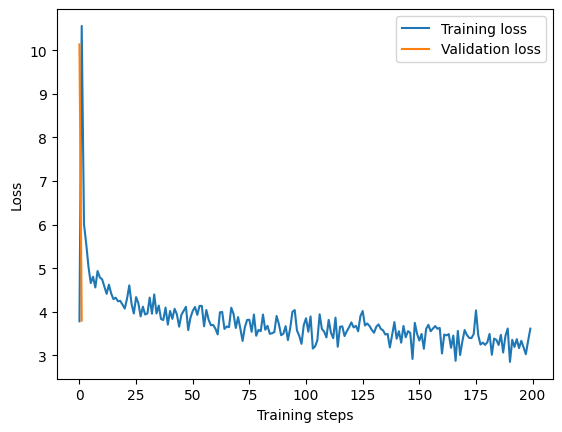

In [22]:
# 5. Plot the fine-tuning loss and MAKE SURE TO SAVE IT AND SUBMIT IT
plt.plot(losses)
plt.plot(validation_losses)
plt.legend(["Training loss", "Validation loss"])
# plot training losses on x axis
plt.plot()
plt.xlabel("Training steps")
plt.ylabel("Loss")

In [23]:
# print a few predictions on the eval dataset to see what the model predicts

# construct a list of questions without the ground truth label
# and compare prediction of the model with the ground truth

def construct_test_samples(example):
    """
    Helper for converting input examples which have
    a separate qquestion, labels, answer options
    into a single string for testing the model.

    Arguments
    ---------
    example: dict
        Sample input from the dataset which contains the
        question, answer labels (e.g. A, B, C, D),
        the answer options for the question, and which
        of the answers is correct.

    Returns
    -------
    input_text: str, str
        Tuple: Formatted test text which contains the question,
        the forwatted answer options (e.g., 'A. <option 1> B. <option 2>' etc);
        the ground truth answer label only.
    """

    answer_options_list = list(zip(
        example["choices"]["label"],
        example["choices"]["text"]
    ))
    # join each label and text with . and space
    answer_options = [f"{label}. {text}" for label, text in answer_options_list] ### YOUR CODE HERE ####
    # join the list of options with spaces into single string
    answer_options_string =" ".join(answer_options) ### YOUR CODE HERE ####
    # combine question and answer options
    input_text = example["question"] + " " + answer_options_string
    # create the test input text which should be:
    # the input text, followed by the string "Answer: "
    # we don't need to append the ground truth answer since we are creating test inputs
    # and the answer should be predicted.
    input_text += " " + "\nAnswer:" ### YOUR CODE HERE ####

    return input_text, example["answerKey"]

test_samples = [construct_test_samples(dataset["validation"][i]) for i in range(10)]
test_samples

[('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york \nAnswer:',
  'A'),
 ('What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other \nAnswer:',
  'A'),
 ('Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary \nAnswer:',
  'B'),
 ('Where are  you likely to find a hamburger? A. fast food restaurant B. pizza C. ground up dead cows D. mouth E. cow carcus \nAnswer:',
  'A'),
 ('James was looking for a good place to buy farmland.  Where might he look? A. midwest B. countryside C. estate D. farming areas E. illinois \nAnswer:',
  'A'),
 ('What island country is ferret popular? A. own home B. north carolina C. great britain D. hutch E. outdoors \nAnswer:',
  'C'),
 ("In what Spanish speaking North American country can you get a great

In [24]:
# Test the model

# set it to evaluation mode
model.eval()

predictions = []
for sample in test_samples:
    input_text = sample[0]
    input_ids = tokenizer(input_text, return_tensors="pt").to(device)
    output = model.generate(
        input_ids.input_ids,
        attention_mask = input_ids.attention_mask,
        max_new_tokens=2,
        do_sample=True,
        temperature=0.4,
    )
    prediction = tokenizer.decode(output[0], skip_special_tokens=True)
    predictions.append((input_text, prediction, sample[1]))

print("Predictions of trained model ", predictions)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Predictions of trained model  [('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york \nAnswer:', 'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york \nAnswer: A.', 'A'), ('What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other \nAnswer:', 'What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other \nAnswer: B.', 'A'), ('Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary \nAnswer:', 'Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary \nAnswer: B.', 'B'), ('Where are  

In [123]:
len(predictions)

10

In [139]:
predictions

[('A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york \nAnswer:',
  'A revolving door is convenient for two direction travel, but it also serves as a security measure at a what? A. bank B. library C. department store D. mall E. new york \nAnswer: B.',
  'A'),
 ('What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other \nAnswer:',
  'What do people aim to do at work? A. complete job B. learn from each other C. kill animals D. wear hats E. talk to each other \nAnswer: B.',
  'A'),
 ('Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary \nAnswer:',
  'Where would you find magazines along side many other printed works? A. doctor B. bookstore C. market D. train station E. mortuary \nAnswer: D.',
  'B'),
 ('Where are  you likely to f

In [31]:
# test model accuracy
correct_predictions = 0
for input_text, prediction, ground_truth in predictions:
    # Extract the predicted answer label (e.g., 'A', 'B', etc.)
    predicted_answer = prediction.split("Answer:")[-1].strip()
    predicted_answer = predicted_answer.replace(".", "").strip()
    ground_truth = ground_truth.replace(".", "").strip()
    print(f"model:{predicted_answer}","|",f"truth:{ground_truth}")
    if predicted_answer == ground_truth:
        correct_predictions += 1

accuracy = correct_predictions / len(predictions)
print(f"Accuracy: {accuracy}")

model:A | truth:A
model:B | truth:A
model:B | truth:B
model:B | truth:A
model:A | truth:A
model:B | truth:C
model:B | truth:B
model:A | truth:D
model:A | truth:A
model:A | truth:C
Accuracy: 0.5


Questions:
> 1. Provide a brief description of the CommonsenseQA dataset. What kind of task was it developed for, what do the single columns contain?
> 2. What loss function is computed for this training? Provide the name of the function (conceptual, not necessarily the name of a function in the code).
> 3. Given your loss curve, do you think your model will perform well on answering common sense questions? (Note: there is no single right answer; you need to interpret your specific plot)
> 4. Inspect the predictions above. On how many test questions did the model predict the right answer? Compute the accuracy.